In [30]:
import matplotlib
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%pylab --no-import-all inline

import pandas as pd

import plotly
import plotly.graph_objs as go
# mode offline
plotly.offline.init_notebook_mode()

import scipy as sp
from scipy.interpolate import SmoothBivariateSpline

Populating the interactive namespace from numpy and matplotlib


# Load datas

In [2]:
fdata = "../../dev/ternaire/miel.csv"
df = pd.DataFrame.from_csv(fdata, sep=";")
df

,glucose,fructose,eau,mtot,xgluc,xfruct,xeau,n,alpha
Pilulier,,,,,,,,,
1,5.9997,6.0304,7.9980,20.0281,0.300,0.301,0.399,1.4360,-44.38
2,6.9987,6.0199,6.9924,20.0110,0.350,0.301,0.349,1.4485,-35.95
3,7.9946,6.0034,6.0601,20.0581,0.399,0.299,0.302,1.4580,-28.17
4,8.9978,6.0620,5.0422,20.1020,0.448,0.302,0.251,1.4715,-19.02
5,10.0011,6.0389,4.0300,20.0700,0.498,0.301,0.201,1.4880,-6.83
6,6.0066,6.9946,7.0827,20.0839,0.299,0.348,0.353,1.4475,-62.65
7,6.9945,7.0864,6.0424,20.1233,0.348,0.352,0.300,1.4600,-59.32
8,8.0343,6.9936,5.0526,20.0805,0.400,0.348,0.252,1.4740,-48.35
9,9.0592,7.0469,4.0465,20.1526,0.450,0.350,0.201,1.4880,-40.05


# 3D plot

## Indice de réfraction

In [3]:
trace = go.Scatter3d(
    x=df.xfruct,
    y=df.xgluc,
    z=df.n,
    mode='markers',
    marker=go.Marker(
        color=df.n,
        colorscale="Viridis",
        colorbar=dict(title="n")
    )
)
data=[trace]
layout=go.Layout(
    height=800, 
    width=800, 
    title='Indice de refraction', 
    scene=dict(
        xaxis=dict(title="x_m(fructose)"),
        yaxis=dict(title="x_m(glucose)"),
        zaxis=dict(title="n")
    ),
)
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

## Pouvoir rotatoire

In [4]:
trace = go.Scatter3d(
    x=df.xfruct,
    y=df.xgluc,
    z=df.alpha,
    mode='markers',
    marker=go.Marker(
        color=df.alpha,
        colorscale="Viridis",
        colorbar=dict(title="alpha")
    )
)
data=[trace]
layout=go.Layout(
    height=800, 
    width=800,
    title='Pouvoir rotatoire', 
    scene=dict(
        xaxis=dict(title="x_m(fructose)"),
        yaxis=dict(title="x_m(glucose)"),
        zaxis=dict(title="alpha")
    ),
)
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

# Ternary plot

Tout frais de la dernière version, ça date de fin avril.

## Indice de réfraction

In [5]:
trace = go.Scatterternary(
    a=df.xfruct,
    b=df.xgluc,
    mode='markers',
    marker=go.Marker(
        size=20,
        color=df.n,
        colorscale="Viridis",
        colorbar=dict(title="n")
    )
)
data=[trace]
layout=go.Layout(
    height=800, 
    width=800, 
    title='Indice de refraction', 
    ternary=dict(
        sum=1,
        aaxis=dict(title="x_m(fructose)"),
        baxis=dict(title="x_m(glucose)"),
        caxis=dict(title="x_m(eau)")
    ),
)
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

## Pouvoir rotatoire

In [6]:
trace = go.Scatterternary(
    a=df.xfruct,
    b=df.xgluc,
    mode='markers',
    marker=go.Marker(
        size=20,
        color=df.alpha,
        colorscale="Viridis",
        colorbar=dict(title="alpha")
    )
)
data=[trace]
layout=go.Layout(
    height=800, 
    width=800, 
    title='Pouvoir rotatoire', 
    ternary=dict(
        sum=1,
        aaxis=dict(title="x_m(fructose)"),
        baxis=dict(title="x_m(glucose)"),
        caxis=dict(title="x_m(eau)")
    ),
)
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

# Contours

In [7]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

## Fit data with splines

In [25]:
# set up the grid
nptsx, nptsy = 50, 50
xn, yn = sp.mgrid[df.xfruct.min():df.xfruct.max():nptsx * 1j,
                  df.xgluc.min():df.xgluc.max():nptsy * 1j]

# fit surface for n
nspl = SmoothBivariateSpline(df.xfruct, df.xgluc, df.n, kx=1, ky=1)
print("residus n = ", nspl.get_residual() / df.n.mean())
nspline = nspl(xn[:, 0], yn[0, :])

# fit surface for alpha
aspl = SmoothBivariateSpline(df.xfruct, df.xgluc, df.alpha, kx=2, ky=2, s=150)
print("residus alpha = ", aspl.get_residual())
aspline = aspl(xn[:, 0], yn[0, :])

residus n =  2.48336760398e-05
residus alpha =  147.73596436274312


## Plot contours

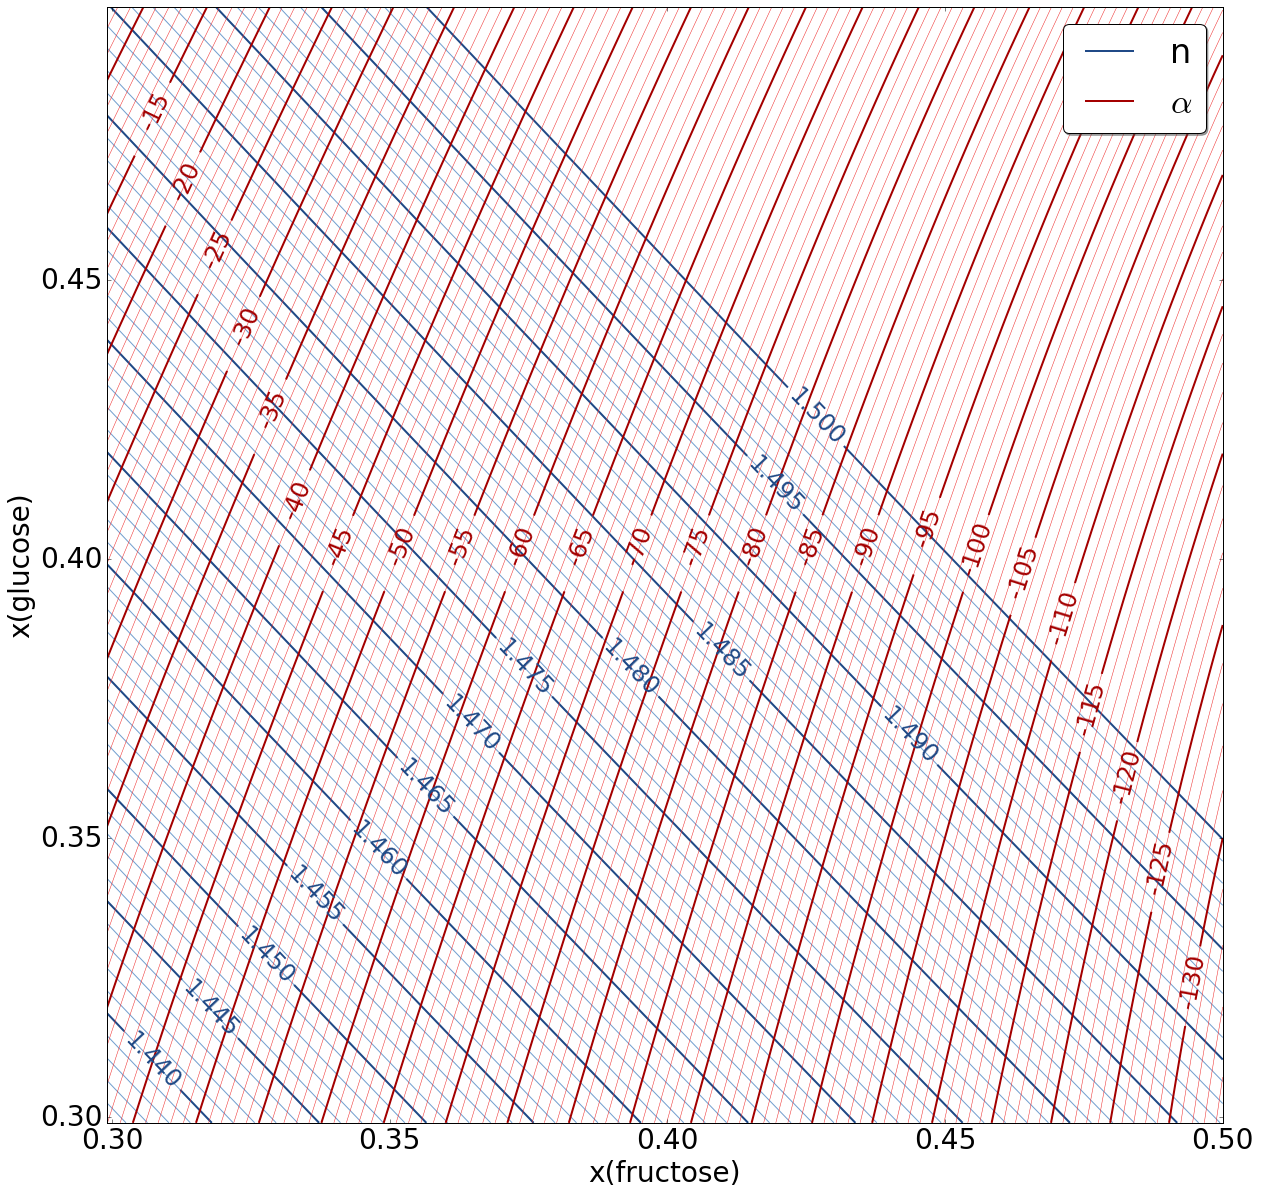

In [34]:
# figure set up
fig = plt.figure(figsize=(20, 20))
font = {'size': 28}
plt.rc('font', **font)
plt.grid(False)

# contours for n
# secondaire
levels = sp.arange(1.35, df.n.max(), 0.001)
nCS = plt.contour(xn, yn, nspline, levels=levels, colors="#729fcf", linewidths=1)
# principal
levels = sp.arange(1.35, df.n.max() + 0.005, 0.005)
nCS = plt.contour(xn, yn, nspline, levels=levels, colors="#204a87", label="n", linewidths=2)
plt.clabel(nCS, inline=1, fontsize=24)

# contours for alpha
# secondaire
alevels = sp.arange(-135, df.alpha.max(), 1)
aCS = plt.contour(xn, yn, aspline, levels=alevels, colors="#ef2929", linewidths=.5)
# principal
alevels = sp.arange(-135, df.alpha.max(), 5)
aCS = plt.contour(xn, yn, aspline, levels=alevels, colors="#a40000", label=r"$\alpha$", linewidths=2)
plt.clabel(aCS, inline=1, fontsize=24, fmt="%5.0f")

# layout and axes
#plt.title("Indice de réfraction et pouvoir rotatoire")
plt.xlabel("x(fructose)")
plt.ylabel("x(glucose)")

# legend
obj = [plt.Line2D([0, 1], [0, 0], color="#204a87", linewidth=2),
       plt.Line2D([0, 1], [0, 0], color="#a40000", linewidth=2)]
plt.legend(obj, ["n", r"$\alpha$"], shadow=True, fancybox=True)
plt.savefig("miel.pdf")